# Data analysis from 2D versus 3D.

In [27]:
# imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle # to load data from pickle file

In [28]:
data_folder = '/Users/agreic/Desktop/Project/Baseline_models/val_test_newest_data/'
model_root_dir = '/Users/agreic/Desktop/Project/Baseline_models/' # to add later TODO

data = {}

for csv_file in os.listdir(data_folder):
    if csv_file.endswith('.csv'):
        data[csv_file] = pd.read_csv(data_folder + csv_file)

print(data.keys())

# model_root_dir = 'C:/Users/aurim/Desktop/Project/' # Assuming you have subfolders named '2d' and '3d' with the models
# root_dir = 'C:/Users/aurim/Desktop/Project/Data/' # Assuming you have subfolders named 'test_set' and 'validation' with the data as pickle files
# test_folder = root_dir + 'test_set/' # Where the data is stored
# validation_folder = root_dir + 'validation/' # Where the data is stored
# save_path = 'C:/Users/aurim/Desktop/Project/' # Where to store the csv for results of best models

# data = {}

# for pickle_file in os.listdir(test_folder):
#     if pickle_file.endswith('.pkl'):
#         with open(test_folder + pickle_file, 'rb') as f:
#             data[pickle_file] = pickle.load(f)
# for pickle_file in os.listdir(validation_folder):
#     if pickle_file.endswith('.pkl'):
#         with open(validation_folder + pickle_file, 'rb') as f:
#             data[pickle_file] = pickle.load(f)

# print(data.keys())

dict_keys(['test_3d_results.csv', 'validation_2d_results.csv', 'test_2d_results.csv', 'validation_3d_results.csv'])


In [29]:
# root_dir = '/Users/agreic/Desktop/Project/Data/Raw/Baseline_Models/'
# # load data
# data = {}
# for pickle_file in os.listdir(root_dir):
#     filename = root_dir + pickle_file
#     # TODO: Redo with validation set, then do for test set!
#     if pickle_file.endswith('.pkl'):
#         with open(filename, 'rb') as f:
#             data[pickle_file[:-4]] = pickle.load(f)
#             print(f'{pickle_file} loaded')

In [30]:
# Show head of data
for key in data.keys():
    print(f'{key}:\n{data[key].head()}')
    break

test_3d_results.csv:
                                          Unnamed: 0  accuracy  precision  \
0  rf_model_0_20_entropy_30_5_5_True_sqrt_balance...  0.997585        1.0   
1  rf_model_1_100_entropy_None_5_2_True_sqrt_bala...  0.996779        1.0   
2  rf_model_1_100_gini_10_10_5_False_sqrt_balance...  0.995974        1.0   
3  rf_model_1_100_log_loss_30_10_2_True_sqrt_bala...  0.995974        1.0   
4   rf_model_1_20_log_loss_20_2_5_True_sqrt_None.pkl  0.995974        1.0   

     recall  roc_auc  pr_auc  f1_score  \
0  0.944444      1.0     1.0  0.971429   
1  0.925926      1.0     1.0  0.961538   
2  0.907407      1.0     1.0  0.951456   
3  0.907407      1.0     1.0  0.951456   
4  0.907407      1.0     1.0  0.951456   

                                     hyperparameters  
0  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  
1  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  
2  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...  
3  {'bootstrap': True, 'ccp_alpha': 0.0, 'c

In [31]:
# Sort by pr_auc
sorted_data = {k: v.sort_values(by='pr_auc', ascending=False) for k, v in data.items()}
print(sorted_data.keys())

sorted_data['validation_3d_results.csv'].head()


dict_keys(['test_3d_results.csv', 'validation_2d_results.csv', 'test_2d_results.csv', 'validation_3d_results.csv'])


,Unnamed: 0,accuracy,precision,recall,roc_auc,pr_auc,f1_score,hyperparameters
0,rf_model_2_50_log_loss_30_2_4_True_sqrt_balanc...,0.977314,1.0,0.632353,0.985045,0.982528,0.774775,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
1,rf_model_1_100_entropy_10_5_5_True_sqrt_balanc...,0.977314,1.0,0.632353,0.985038,0.982499,0.774775,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,rf_model_2_50_gini_20_10_2_True_log2_balanced.pkl,0.978221,1.0,0.647059,0.985031,0.982403,0.785714,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
3,rf_model_2_100_gini_10_10_2_True_log2_balanced...,0.978221,1.0,0.647059,0.984974,0.981535,0.785714,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
4,rf_model_3_100_log_loss_None_10_5_True_sqrt_ba...,0.976407,1.0,0.617647,0.984967,0.981364,0.763636,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."


In [32]:
df2d = sorted_data['validation_2d_results.csv'].sort_values(by=['pr_auc','accuracy'],ascending=False)
df3d = sorted_data['validation_3d_results.csv'].sort_values(by=['pr_auc','accuracy'],ascending=False)

# dict_keys(['test_3d_results.csv', 'validation_2d_results.csv', 'test_2d_results.csv', 'validation_3d_results.csv'])

# dict_keys(['results_2D.pkl', 'results_3D.pkl', 'validation_2D.pkl', 'validation_3D.pkl'])

In [33]:
len(df2d), len(df3d)

(34560, 34560)

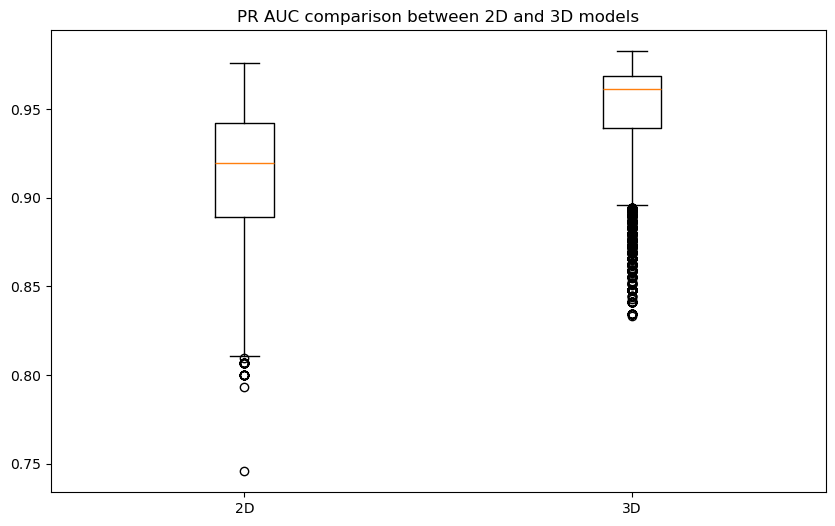

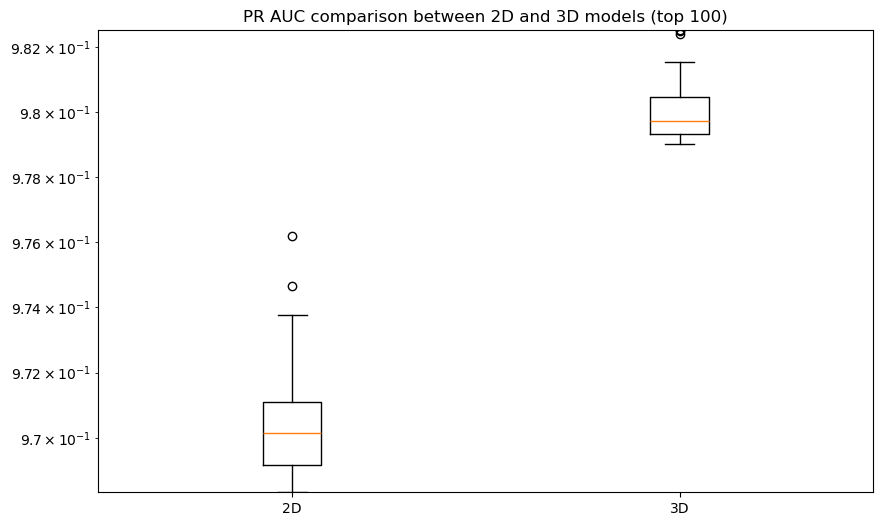

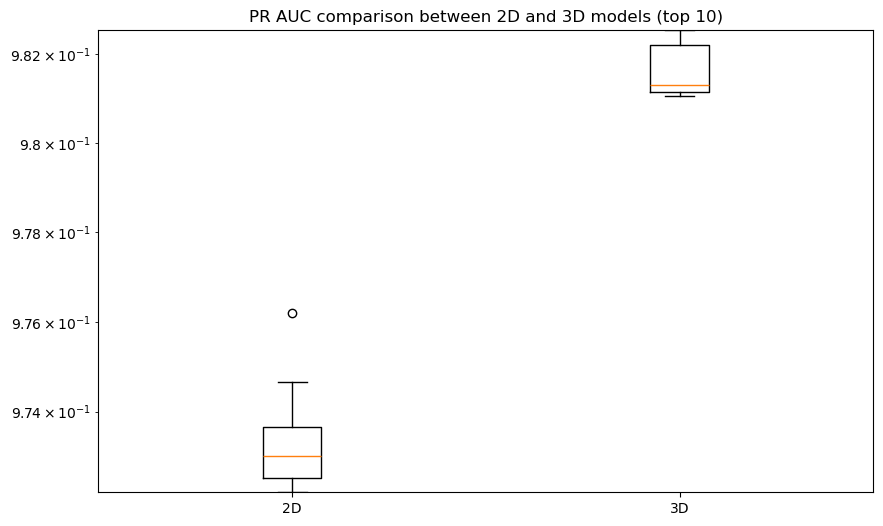

In [34]:
# Calculate statistic how well 3D models performs compared to 2D models

# Plot boxplots of results
plt.figure(figsize=(10,6))
plt.boxplot([df2d['pr_auc'], df3d['pr_auc']], tick_labels=['2D', '3D'])
plt.title('PR AUC comparison between 2D and 3D models')
plt.show()

# Same for the top 100 models
df2d_top100 = df2d.head(100)
df3d_top100 = df3d.head(100)
plt.figure(figsize=(10,6))
plt.boxplot([df2d_top100['pr_auc'], df3d_top100['pr_auc']], tick_labels=['2D', '3D'])
plt.title('PR AUC comparison between 2D and 3D models (top 100)')
plt.ylim(min(df2d_top100['pr_auc'].min(), df3d_top100['pr_auc'].min()), max(df2d_top100['pr_auc'].max(), df3d_top100['pr_auc'].max()))
plt.yscale('log')
plt.show()

# Same for top 10 models    
df2d_top10 = df2d.head(10)
df3d_top10 = df3d.head(10)
plt.figure(figsize=(10,6))
plt.boxplot([df2d_top10['pr_auc'], df3d_top10['pr_auc']], tick_labels=['2D', '3D'])
plt.title('PR AUC comparison between 2D and 3D models (top 10)')
plt.ylim(min(df2d_top10['pr_auc'].min(), df3d_top10['pr_auc'].min()), max(df2d_top10['pr_auc'].max(), df3d_top10['pr_auc'].max()))
plt.yscale('log')
plt.show()


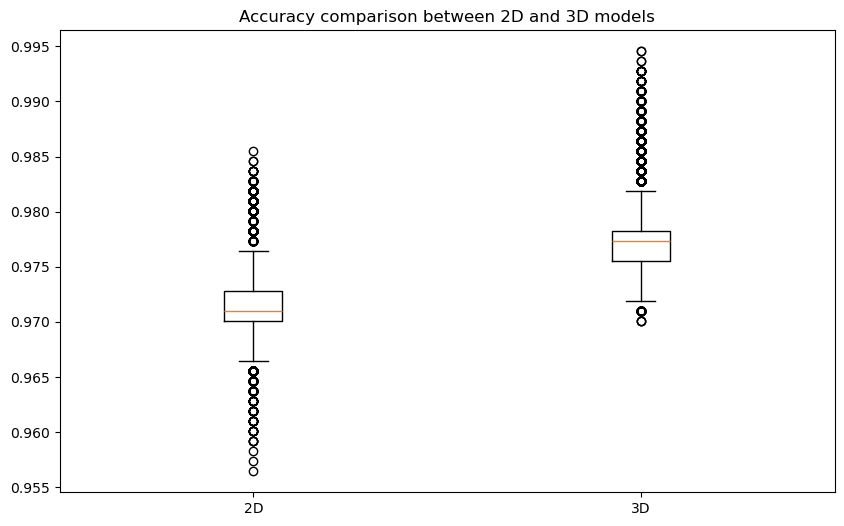

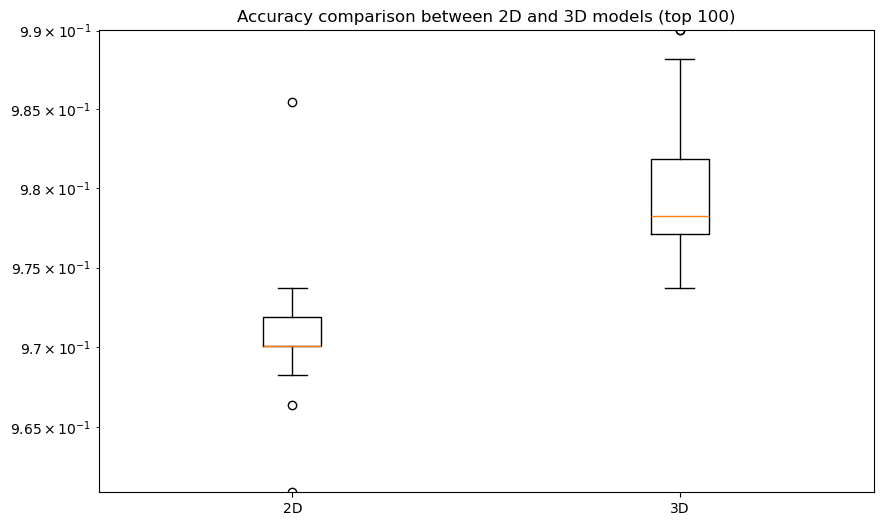

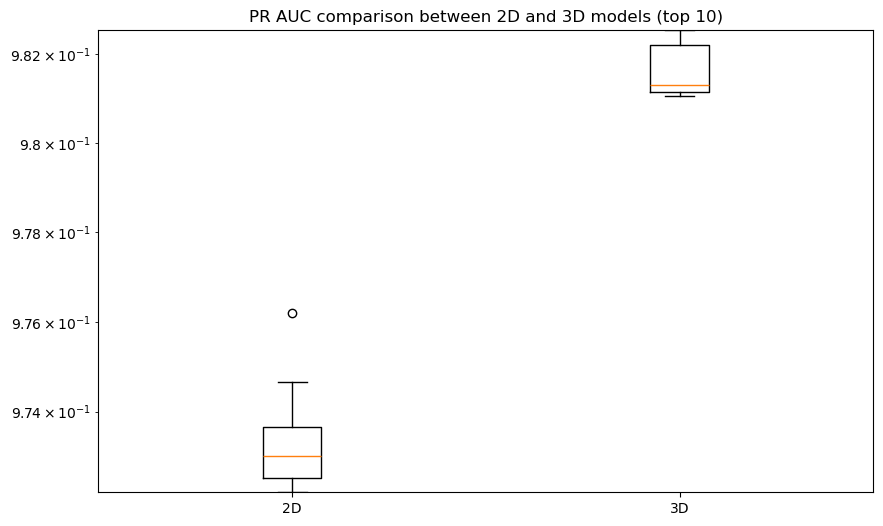

In [35]:
# Plot for accuracy
plt.figure(figsize=(10,6))
plt.boxplot([df2d['accuracy'], df3d['accuracy']], tick_labels=['2D', '3D'])
plt.title('Accuracy comparison between 2D and 3D models')
plt.show()

# Same for the top 100 models
plt.figure(figsize=(10,6))
plt.boxplot([df2d_top100['accuracy'], df3d_top100['accuracy']], tick_labels=['2D', '3D'])
plt.title('Accuracy comparison between 2D and 3D models (top 100)')
plt.ylim(min(df2d_top100['accuracy'].min(), df3d_top100['accuracy'].min()), max(df2d_top100['accuracy'].max(), df3d_top100['accuracy'].max()))
plt.yscale('log')
plt.show()

# Same for top 10 models
df2d_top10 = df2d.head(10)
df3d_top10 = df3d.head(10)
plt.figure(figsize=(10,6))
plt.boxplot([df2d_top10['pr_auc'], df3d_top10['pr_auc']], tick_labels=['2D', '3D'])
plt.title('PR AUC comparison between 2D and 3D models (top 10)')
plt.ylim(min(df2d_top10['pr_auc'].min(), df3d_top10['pr_auc'].min()), max(df2d_top10['pr_auc'].max(), df3d_top10['pr_auc'].max()))
plt.yscale('log')
plt.show()


## 3D models are better than 2D models.

In [36]:
# Print the best hyperparameters for 2D and 3D models
print(f'Best hyperparameters for 2D model:\n{df2d.head(1)['hyperparameters'].values[0]}')
print(f'Best hyperparameters for 3D model:\n{df3d.head(1)['hyperparameters'].values[0]}')


Best hyperparameters for 2D model:
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best hyperparameters for 3D model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [52]:
# The model_name follows this convention:  model_name = f'rf_model_{index}_{n_estimators}_{criterion}_{max_depth}_{min_samples_split}_{min_samples_leaf}_{bootstrap}_{max_features}_{class_weight}.pkl'
# The best model is the first one in the sorted dataframe
best_model_3d = df3d.head()['Unnamed: 0'].values[0]
print(f'Best 3D model: {best_model_3d}')
best_model_3d_path = model_root_dir + '3d/' + best_model_3d
print(best_model_3d_path)

best_model_2d = df2d.head()['Unnamed: 0'].values[0]
print(f'Best 2D model: {best_model_2d}')
best_model_2d_path = model_root_dir + '2d/' + best_model_2d
print(best_model_2d_path)

# model_dict = {}
# for model in [best_model_2d_path, best_model_3d_path]:
#     with open(model, 'rb') as f:
#         model_dict[os.path.basename(model)] = pickle.load(f)
#         print(f'{model} loaded as {os.path.basename(model)}')

print(data.keys())

Best 3D model: rf_model_2_50_log_loss_30_2_4_True_sqrt_balanced.pkl
/Users/agreic/Desktop/Project/Baseline_models/3d/rf_model_2_50_log_loss_30_2_4_True_sqrt_balanced.pkl
Best 2D model: rf_model_4_20_entropy_10_10_4_False_log2_None.pkl
/Users/agreic/Desktop/Project/Baseline_models/2d/rf_model_4_20_entropy_10_10_4_False_log2_None.pkl
dict_keys(['test_3d_results.csv', 'validation_2d_results.csv', 'test_2d_results.csv', 'validation_3d_results.csv'])


In [54]:
# Get the rows in the appropriate test sets where the name is model_name
# test set are results_2D.pkl and results_3D.pkl

test_2d = pd.DataFrame(data['test_2d_results.csv'])
test_3d = pd.DataFrame(data['test_3d_results.csv'])

# Find where the model name is the same as the best model
best_model_2d = df2d.head(1)['Unnamed: 0'].values[0]
best_model_3d = df3d.head(1)['Unnamed: 0'].values[0]

print(best_model_2d)
print(best_model_3d)

# Get the rows where the model name is the same as the best model
best_model_2d_row = test_2d[test_2d['Unnamed: 0'] == best_model_2d]
best_model_3d_row = test_3d[test_3d['Unnamed: 0'] == best_model_3d]

# Put it into a pandas dataframe and present the results nicely:
best_model_2d_row = pd.DataFrame(best_model_2d_row)
best_model_3d_row = pd.DataFrame(best_model_3d_row)

best_model_2d_row = best_model_2d_row.drop(columns=['Unnamed: 0'])
best_model_2d_row['dimension'] = '2D'
best_model_3d_row = best_model_3d_row.drop(columns=['Unnamed: 0'])
best_model_3d_row['dimension'] = '3D'

# Concatenate the two dataframes
best_model_2d_row = best_model_2d_row.set_index('dimension')
best_model_3d_row = best_model_3d_row.set_index('dimension')

df = pd.concat([best_model_2d_row, best_model_3d_row])
# Rename column to model_name
df.rename(columns={'Unnamed: 0':'model_name'}, inplace=True)

df.head()


rf_model_4_20_entropy_10_10_4_False_log2_None.pkl
rf_model_2_50_log_loss_30_2_4_True_sqrt_balanced.pkl


,accuracy,precision,recall,roc_auc,pr_auc,f1_score,hyperparameters
dimension,,,,,,,
2D,0.992754,1.0,0.833333,0.990437,0.985387,0.909091,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_..."
3D,0.995974,1.0,0.907407,0.999984,0.999660,0.951456,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."


In [56]:
# Export the dataframe to a csv file
save_path = '/Users/agreic/Desktop/Project/Baseline_models/'
df.to_csv(save_path + 'best_model_results.csv')